# Instalar los modulos

In [1]:
!pip install prody
!pip install MDAnalysis[analysis] MDAnalysisTests

     |████████████████████████████████| 2.3MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/76/02/8b606c4aa92ff61b5eda71d23b499ab1de57d5e818be33f77b01a6f435a8/biopython-1.78-cp36-cp36m-manylinux1_x86_64.whl
  Created wheel for prody: filename=ProDy-1.11-cp36-cp36m-linux_x86_64.whl size=2637350 sha256=7fd56f2c4a83f8b6bd1c044e0348a2cd4e90ccd6cb6db664d052fee75b71228d
  Stored in directory: /root/.cache/pip/wheels/fa/d4/c3/a072810758dacd09cf77220bbb7e24f98ca9c47e8a16a8dae5
Successfully built prody
     |████████████████████████████████| 19.6MB 1.2MB/s 
     |████████████████████████████████| 47.7MB 96kB/s 
     |████████████████████████████████| 2.0MB 45.5MB/s 
     |████████████████████████████████| 71kB 12.4MB/s 
     |████████████████████████████████| 337kB 47.5MB/s 
     |████████████████████████████████| 348kB 47.2MB/s 
  Created wheel for MDA

In [5]:
!wget https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/sample_trajectory.pdb
!wget https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/initial.pdb

--2020-12-20 19:19:02--  https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/sample_trajectory.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4099053 (3.9M) [text/plain]
Saving to: ‘sample_trajectory.pdb.1’

sample_trajectory.p 100%[===================>]   3.91M  --.-KB/s    in 0.1s    

2020-12-20 19:19:02 (37.5 MB/s) - ‘sample_trajectory.pdb.1’ saved [4099053/4099053]

--2020-12-20 19:19:02--  https://raw.githubusercontent.com/cabb99/cdec039/master/Clase4/initial.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4050 (4.

# Alinear y calcular RMSD
$${RMSD}=\frac{\sum_{i=1}^n \sqrt{(x_1-x_0)^2+(y_1-y_0)^2+(z_1-z_0)^2}}{n}$$

In [6]:
#Importar modulos
import prody
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

In [7]:
template=prody.parsePDB('initial.pdb') #Estructura inicial
traj=prody.parsePDB('sample_trajectory.pdb') #Trajectoria

@> 50 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 50 atoms and 1000 coordinate set(s) were parsed in 0.11s.


In [8]:
#Calcular RMSD (root mean square deviation)
rmsds = prody.calcRMSD(traj)
rmsds.mean()

490.250452494701

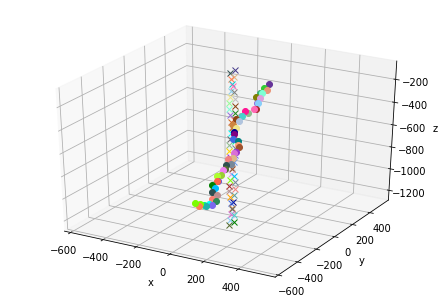

In [9]:
#Visualizar la molecula (no esta alineada)
prody.showProtein(template,hmarker='x')
traj.setACSIndex(0)
prody.showProtein(traj)
#plt.legend()

In [10]:
#Ver las coordenadas
x=traj.getCoords()
x

array([[  203.79 ,     9.818,   -67.309],
       [  191.848,   -18.856,   -93.744],
       [  193.804,     9.268,  -124.631],
       [  165.634,    -9.078,  -144.808],
       [  159.354,    23.452,  -166.01 ],
       [  137.595,     5.418,  -195.242],
       [  140.683,    35.939,  -219.387],
       [  139.909,    11.586,  -252.855],
       [  124.357,    45.753,  -273.022],
       [  125.368,    22.824,  -308.856],
       [   98.943,    47.449,  -326.023],
       [   86.133,    14.075,  -348.593],
       [   54.094,    36.937,  -357.673],
       [   46.883,    14.27 ,  -390.66 ],
       [   32.012,    48.364,  -408.968],
       [    7.803,    23.976,  -431.453],
       [   10.024,    53.203,  -462.095],
       [   -7.028,    23.38 ,  -485.356],
       [    0.665,    44.56 ,  -517.292],
       [    4.921,    11.384,  -542.056],
       [  -10.879,    37.157,  -572.506],
       [    1.415,     9.132,  -598.338],
       [   13.341,    38.62 ,  -624.454],
       [   28.836,    11.388,  -64

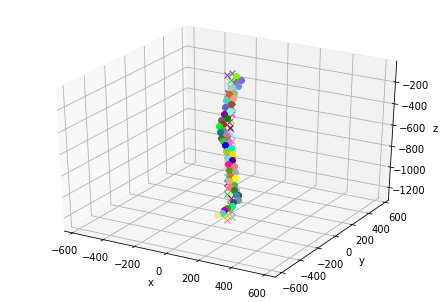

In [11]:
#Alinear la proteina
superposed,transformation=prody.superpose(traj,template)
prody.showProtein(template,hmarker='x')
traj.setACSIndex(0)
prody.showProtein(superposed)

In [12]:
#Coordenadas nuevas
superposed.getCoords()

array([[   21.58728046,    36.75148223,   -36.17872897],
       [   49.00949328,    35.85167061,   -66.3587132 ],
       [   18.23091734,    41.69766426,   -94.05881613],
       [   37.88141285,    22.27240747,  -121.8752388 ],
       [    4.56032036,    17.18986342,  -142.14927748],
       [   22.35455938,     6.14663983,  -177.00040847],
       [  -10.33151289,    11.05423756,  -197.77501736],
       [   10.89256121,    22.04233786,  -231.57701492],
       [  -22.87533408,     7.59268909,  -253.18473067],
       [   -3.47712719,    20.69438085,  -288.7219219 ],
       [  -26.27280246,    -3.63734614,  -310.80588417],
       [    6.24155365,    -5.70596108,  -337.74771698],
       [  -13.44093901,   -37.21562654,  -353.60190981],
       [    6.90834268,   -32.7451431 ,  -388.52833377],
       [  -26.70248729,   -47.00067187,  -408.17069487],
       [   -1.74079014,   -61.23060839,  -437.51090673],
       [  -33.61975035,   -55.34180389,  -464.84470287],
       [   -4.18461684,   -61.7

In [13]:
#Matriz de transformacion
transformation.getMatrix().round(2)

array([[  -0.12,   -0.99,    0.09,   61.01],
       [   0.96,   -0.14,   -0.25, -174.15],
       [   0.26,    0.06,    0.96,  -25.08],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [14]:
#Matriz de rotacion
transformation.getRotation().round(2)

array([[-0.12, -0.99,  0.09],
       [ 0.96, -0.14, -0.25],
       [ 0.26,  0.06,  0.96]])

In [15]:
#Matriz de translacion
transformation.getTranslation().round(2)

array([  61.01, -174.15,  -25.08])

In [16]:
#Transformar la matriz de coordenadas original(x)
np.dot(x, transformation.getRotation().T) + transformation.getTranslation()

array([[   21.58728046,    36.75148223,   -36.17872897],
       [   49.00949328,    35.85167061,   -66.3587132 ],
       [   18.23091734,    41.69766426,   -94.05881613],
       [   37.88141285,    22.27240747,  -121.8752388 ],
       [    4.56032036,    17.18986342,  -142.14927748],
       [   22.35455938,     6.14663983,  -177.00040847],
       [  -10.33151289,    11.05423756,  -197.77501736],
       [   10.89256121,    22.04233786,  -231.57701492],
       [  -22.87533408,     7.59268909,  -253.18473067],
       [   -3.47712719,    20.69438085,  -288.7219219 ],
       [  -26.27280246,    -3.63734614,  -310.80588417],
       [    6.24155365,    -5.70596108,  -337.74771698],
       [  -13.44093901,   -37.21562654,  -353.60190981],
       [    6.90834268,   -32.7451431 ,  -388.52833377],
       [  -26.70248729,   -47.00067187,  -408.17069487],
       [   -1.74079014,   -61.23060839,  -437.51090673],
       [  -33.61975035,   -55.34180389,  -464.84470287],
       [   -4.18461684,   -61.7

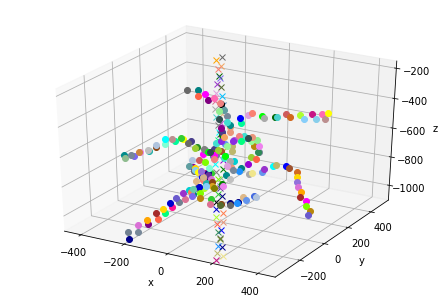

In [17]:
#Solo hemos alineado una estructura, necesitamos alinear la trayectoria
prody.showProtein(template,hmarker='x')
for i in [200,400,600,800]:
    traj.setACSIndex(i)
    prody.showProtein(superposed)

In [18]:
#Alinear trayectoria
traj.setACSIndex(0)
prody.alignCoordsets(traj);

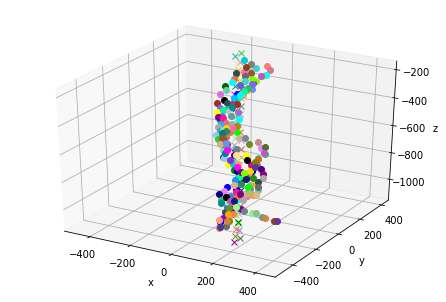

In [19]:
#Ver la trayectoria alineada
prody.showProtein(template,hmarker='x')
for i in [200,400,600,800]:
    traj.setACSIndex(i)
    prody.showProtein(traj)

In [20]:
#Calcular RMSD nuevamente
traj.setACSIndex(0)
rmsds = prody.calcRMSD(traj)
print(rmsds.mean())

117.12408869863783


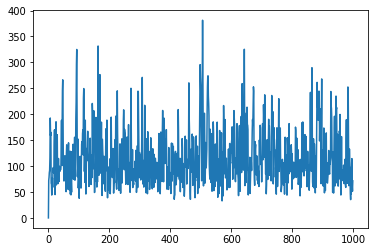

In [21]:
#Plot de RMSD durante la simulacion
plt.plot(rmsds)

# Calcular longitud de enlaces


In [38]:
#Calcular distancias entre los atomos
import scipy.spatial.distance as sdist
d=sdist.pdist(template.getCoords())
d

array([41.01403439, 56.85485951, 89.12954575, ..., 41.0142017 ,
       56.8548482 , 41.01392111])

In [39]:
d.shape

(1225,)

In [40]:
distances=sdist.squareform(d)
distances.shape

(50, 50)

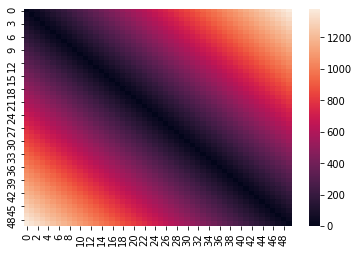

In [41]:
#Ver matriz de distancias
import seaborn as sns
sns.heatmap(distances)

In [42]:
distances[:5,:5].round(1)

array([[  0. ,  41. ,  56.9,  89.1, 113.7],
       [ 41. ,   0. ,  41. ,  56.9,  89.1],
       [ 56.9,  41. ,   0. ,  41. ,  56.9],
       [ 89.1,  56.9,  41. ,   0. ,  41. ],
       [113.7,  89.1,  56.9,  41. ,   0. ]])

In [43]:
#Tomar distancias entre i e i+1
np.diag(distances,k=1)

array([41.01403439, 41.01422647, 41.01476033, 41.0142766 , 41.01366027,
       41.01405385, 41.0139992 , 41.01376726, 41.01392276, 41.01443381,
       41.01487657, 41.01456001, 41.01415543, 41.01465096, 41.01458933,
       41.01466138, 41.01468001, 41.01436281, 41.01418313, 41.01401568,
       41.01437608, 41.01453989, 41.01406442, 41.01399972, 41.01423226,
       41.01438197, 41.01447716, 41.01429044, 41.01398132, 41.01407506,
       41.01413544, 41.01467909, 41.01477798, 41.014657  , 41.01419435,
       41.01371182, 41.01373639, 41.01434121, 41.01453704, 41.01440693,
       41.01426436, 41.01432737, 41.01451199, 41.01422881, 41.01413733,
       41.01410257, 41.01388873, 41.0142017 , 41.01392111])

In [44]:
#Calcular distancias promedio en la estructura inicial
ref_bonds={}
for i in range(10):
    ref_bonds[i]=np.diag(distances,k=i)
    print(ref_bonds[i].mean().round(4),'±',ref_bonds[i].std().round(4))

0.0 ± 0.0
41.0143 ± 0.0003
56.8549 ± 0.0001
89.1294 ± 0.0001
113.6579 ± 0.0001
143.1458 ± 0.0001
170.3649 ± 0.0
198.4004 ± 0.0
226.9465 ± 0.0
254.1831 ± 0.0


In [45]:
traj.getCoordsets().shape

(1000, 50, 3)

In [46]:
#Calcular distancias promedio en la trayectoria
bonds={i:[] for i in range(10)}
for frame in traj.getCoordsets():
    d=sdist.pdist(frame)
    distances=sdist.squareform(d)
    for i in range(10):
        bonds[i]+=[np.diag(distances,k=i)]
for i in range(10):
    bonds[i]=np.concatenate(bonds[i])

In [47]:
for i in range(10):
    print(bonds[i].mean().round(4),'±',bonds[i].std().round(4))

0.0 ± 0.0
41.026 ± 1.4627
57.1128 ± 1.4191
88.9602 ± 1.3761
111.6623 ± 3.2209
140.8461 ± 3.9967
164.6778 ± 6.1778
192.2838 ± 7.6838
216.2136 ± 10.1952
242.6418 ± 12.2861


In [48]:
#Ver la distribucion de distancias
import pandas
data=pandas.concat([pandas.Series(bonds[b]-ref_bonds[b].mean(),name=b) for b in bonds],keys=bonds.keys())
data=data.reset_index()
data.columns=['Bond','id','distance']
data.tail()

,Bond,id,distance
454995,9,40995,-9.910460
454996,9,40996,-9.366780
454997,9,40997,-9.031571
454998,9,40998,-6.338231
454999,9,40999,-7.305333


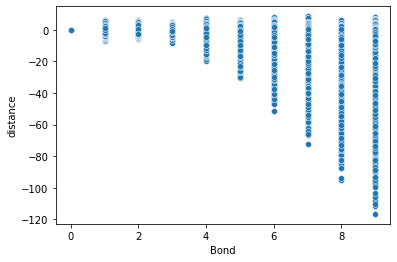

In [49]:
import seaborn as sns
sns.scatterplot(x='Bond',y='distance',data=data)
#plt.xlim(0,10)
#plt.ylim(-20,20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; yo

(-20.0, 20.0)

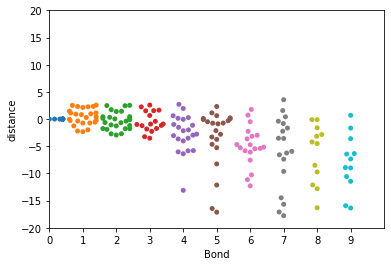

In [50]:
import seaborn as sns
sns.swarmplot(x='Bond',y='distance',data=data.sample(200))
plt.xlim(0,10)
plt.ylim(-20,20)

(-20.0, 20.0)

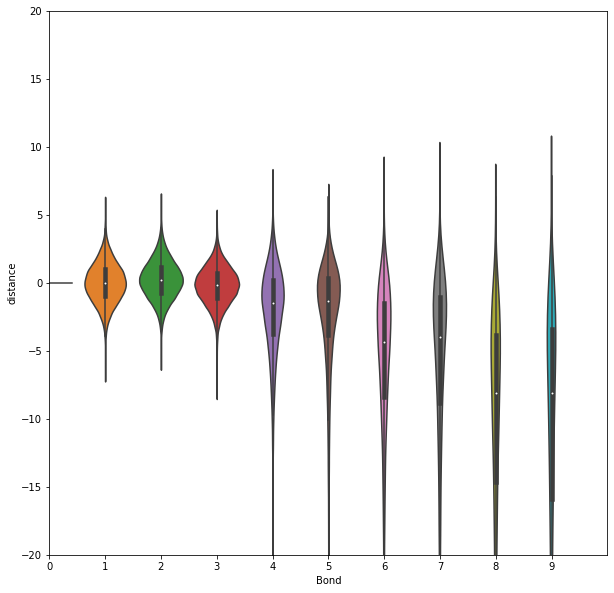

In [51]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.violinplot(x='Bond',y='distance',data=data)
plt.xlim(0,10)
plt.ylim(-20,20)

# Calcular longitud de persistencia

La longitud de persistencia es una longitud caracteristica de un polimero. Es aproximadamente la distancia en la cual el polimero cambia de direccion.

$$cos(\theta)=e^{-\frac{L}{L_p}}$$

/usr/local/lib/python3.6/dist-packages/MDAnalysisTests/__init__.py:126: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


The persistence length is 1.0 Angstroms


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


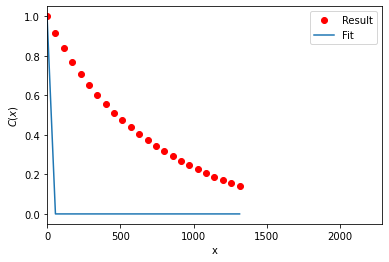

In [36]:
%matplotlib inline
from MDAnalysis.tests.datafiles import TRZ_psf, TRZ
import MDAnalysis as mda
from MDAnalysis.analysis import polymer
u = mda.Universe('sample_trajectory.pdb')
u = mda.Universe('sample_trajectory.pdb')
persistence_length = polymer.PersistenceLength([u.atoms[::2],u.atoms[1::2]])
persistence_length.run(start=10,step=1)
print('The persistence length is {} Angstroms'.format(persistence_length.lp))
persistence_length.plot()

The persistence length is 685.519009326808 Angstroms


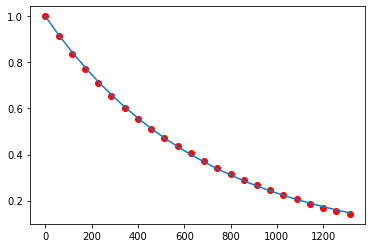

In [37]:
import scipy.optimize
x=persistence_length.x
y=persistence_length.results
lp=scipy.optimize.curve_fit(lambda x,a:np.exp(-x/a), x, y,p0=[1000])[0][0]
fit=np.exp(-x/lp)
print('The persistence length is {} Angstroms'.format(lp))
plt.figure()
plt.scatter(x,y,c='red')
plt.plot(x,fit)